In [1]:
import pandas as pd
import numpy as np 
import matplotlib.pyplot as plt 
%matplotlib inline


In [15]:
df=pd.read_csv("https://raw.githubusercontent.com/codebasics/py/master/ML/9_decision_tree/Exercise/titanic.csv")

In [16]:
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [17]:
df.duplicated().sum()

0

In [18]:
df.isna().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [26]:
df['Cabin'].unique()

array([nan, 'C85', 'C123', 'E46', 'G6', 'C103', 'D56', 'A6',
       'C23 C25 C27', 'B78', 'D33', 'B30', 'C52', 'B28', 'C83', 'F33',
       'F G73', 'E31', 'A5', 'D10 D12', 'D26', 'C110', 'B58 B60', 'E101',
       'F E69', 'D47', 'B86', 'F2', 'C2', 'E33', 'B19', 'A7', 'C49', 'F4',
       'A32', 'B4', 'B80', 'A31', 'D36', 'D15', 'C93', 'C78', 'D35',
       'C87', 'B77', 'E67', 'B94', 'C125', 'C99', 'C118', 'D7', 'A19',
       'B49', 'D', 'C22 C26', 'C106', 'C65', 'E36', 'C54',
       'B57 B59 B63 B66', 'C7', 'E34', 'C32', 'B18', 'C124', 'C91', 'E40',
       'T', 'C128', 'D37', 'B35', 'E50', 'C82', 'B96 B98', 'E10', 'E44',
       'A34', 'C104', 'C111', 'C92', 'E38', 'D21', 'E12', 'E63', 'A14',
       'B37', 'C30', 'D20', 'B79', 'E25', 'D46', 'B73', 'C95', 'B38',
       'B39', 'B22', 'C86', 'C70', 'A16', 'C101', 'C68', 'A10', 'E68',
       'B41', 'A20', 'D19', 'D50', 'D9', 'A23', 'B50', 'A26', 'D48',
       'E58', 'C126', 'B71', 'B51 B53 B55', 'D49', 'B5', 'B20', 'F G63',
       'C62 C64',

In [32]:
df['Cabin'].mode()[1]

'G6'

In [19]:
df['Age'].fillna(df['Age'].mean(),inplace=True)

In [33]:
df['Cabin'].fillna(df['Cabin'].mode()[1],inplace=True)

In [34]:
df.isna().sum()

PassengerId    0
Survived       0
Pclass         0
Name           0
Sex            0
Age            0
SibSp          0
Parch          0
Ticket         0
Fare           0
Cabin          0
Embarked       2
dtype: int64

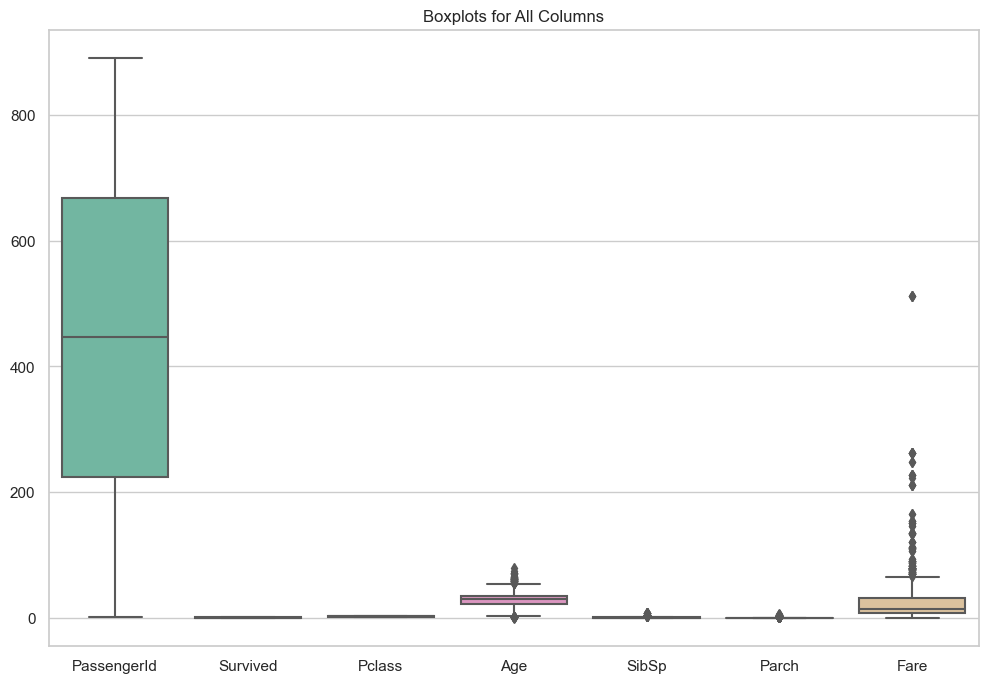

In [35]:
import seaborn as sns 
sns.set(style="whitegrid")

# Create boxplots for all columns
plt.figure(figsize=(12, 8))
sns.boxplot(data=df,  palette="Set2")  # "h" for horizontal orientation

# Show the plot
plt.title("Boxplots for All Columns")
plt.show()

In [24]:
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [47]:
df['Embarked'].fillna(df['Embarked'].mode(),inplace=True)

In [39]:
df

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.000000,1,0,A/5 21171,7.2500,B96 B98,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.000000,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.000000,0,0,STON/O2. 3101282,7.9250,G6,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.000000,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.000000,0,0,373450,8.0500,G6,S
...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27.000000,0,0,211536,13.0000,G6,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.000000,0,0,112053,30.0000,B42,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,29.699118,1,2,W./C. 6607,23.4500,G6,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.000000,0,0,111369,30.0000,C148,C


In [41]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          891 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        891 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [42]:
df1=df

In [43]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          891 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        891 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [44]:
df1.drop(columns=['PassengerId','Name','Ticket'],inplace=True)

In [50]:
df1.Embarked.fillna(df1.Embarked.mode()[0],inplace=True)

In [51]:
df1.Embarked.unique()

array(['S', 'C', 'Q'], dtype=object)

In [78]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Pclass    891 non-null    int64  
 1   Sex       891 non-null    int64  
 2   Age       891 non-null    float64
 3   SibSp     891 non-null    int64  
 4   Parch     891 non-null    int64  
 5   Fare      891 non-null    float64
 6   Embarked  891 non-null    int64  
dtypes: float64(2), int64(5)
memory usage: 48.9 KB


In [77]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Pclass    891 non-null    int64  
 1   Sex       891 non-null    int64  
 2   Age       891 non-null    float64
 3   SibSp     891 non-null    int64  
 4   Parch     891 non-null    int64  
 5   Fare      891 non-null    float64
 6   Embarked  891 non-null    int64  
dtypes: float64(2), int64(5)
memory usage: 48.9 KB


In [53]:
df1.Sex.unique()

array(['male', 'female'], dtype=object)

In [54]:
df1['Sex']=df1['Sex'].map({'male':1,'female':2})

In [55]:
df1['Pclass'].unique()

array([3, 1, 2], dtype=int64)

In [59]:
df1['SibSp'].unique()

array([1, 0, 3, 4, 2, 5, 8], dtype=int64)

In [63]:
df1['Embarked']=df1['Embarked'].map({'S':1,'C':2,'Q':3})

In [64]:
df1.drop('Cabin',axis=1,inplace=True)

In [76]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Pclass    891 non-null    int64  
 1   Sex       891 non-null    int64  
 2   Age       891 non-null    float64
 3   SibSp     891 non-null    int64  
 4   Parch     891 non-null    int64  
 5   Fare      891 non-null    float64
 6   Embarked  891 non-null    int64  
dtypes: float64(2), int64(5)
memory usage: 48.9 KB


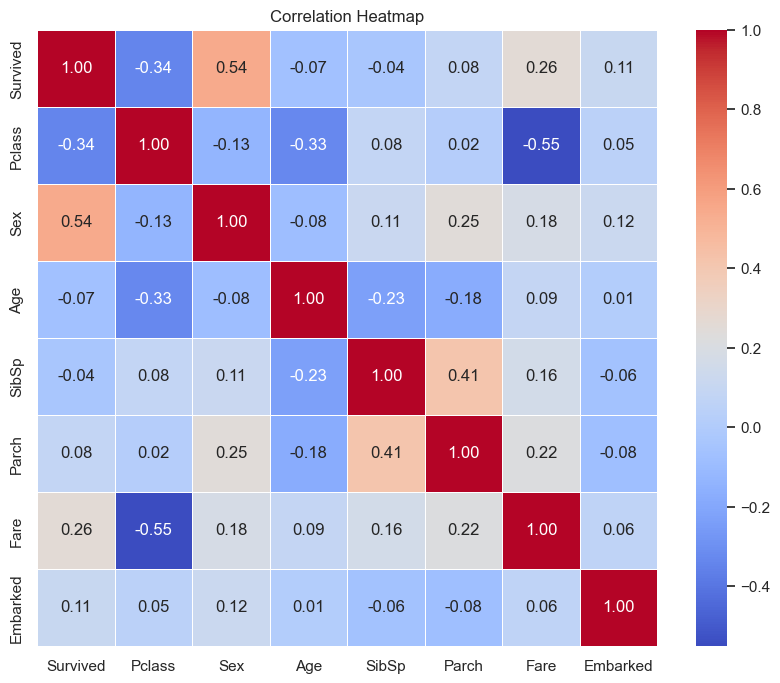

In [67]:
correlation_matrix = df1.corr()

# Set up the matplotlib figure
plt.figure(figsize=(10, 8))

# Create a heatmap using seaborn
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f", linewidths=0.5)

# Show the plot
plt.title("Correlation Heatmap")
plt.show()

In [79]:
df2=pd.read_csv("https://raw.githubusercontent.com/codebasics/py/master/ML/9_decision_tree/Exercise/titanic.csv")

In [68]:
from sklearn.preprocessing import StandardScaler
scaler=StandardScaler()

In [ ]:
df['Survived']

In [87]:
x=df1

In [89]:
y=df2.Survived

In [90]:
y

0      0
1      1
2      1
3      1
4      0
      ..
886    0
887    1
888    0
889    1
890    0
Name: Survived, Length: 891, dtype: int64

In [91]:
x=scaler.fit_transform(x)

In [92]:
x

array([[ 0.82737724, -0.73769513, -0.5924806 , ..., -0.47367361,
        -0.50244517, -0.56883712],
       [-1.56610693,  1.35557354,  0.63878901, ..., -0.47367361,
         0.78684529,  1.00518113],
       [ 0.82737724,  1.35557354, -0.2846632 , ..., -0.47367361,
        -0.48885426, -0.56883712],
       ...,
       [ 0.82737724,  1.35557354,  0.        , ...,  2.00893337,
        -0.17626324, -0.56883712],
       [-1.56610693, -0.73769513, -0.2846632 , ..., -0.47367361,
        -0.04438104,  1.00518113],
       [ 0.82737724, -0.73769513,  0.17706291, ..., -0.47367361,
        -0.49237783,  2.57919938]])

In [93]:
from sklearn.model_selection import train_test_split

In [94]:
X_train,X_test,y_train,y_test=train_test_split(x,y,test_size=0.25,random_state=10)

In [95]:
from sklearn.tree import DecisionTreeClassifier
model=DecisionTreeClassifier()

In [96]:
model.fit(X_train,y_train)

DecisionTreeClassifier()

In [97]:
model.score(X_train,y_train)

0.9850299401197605

In [98]:
y_pred=model.predict(X_test)

In [104]:
y_pred_train=model.predict(X_train)

In [99]:
from sklearn.metrics import accuracy_score

In [100]:
accuracy_score(y_test,y_pred)

0.7982062780269058

In [105]:
accuracy_score(y_train,y_pred_train)

0.9850299401197605

In [103]:
round(0.7982062780269058*100,2)

79.82

In [106]:
df2.shape

(891, 12)

[Text(0.5257052345204841, 0.9761904761904762, 'x[1] <= 0.309\ngini = 0.479\nsamples = 668\nvalue = [402, 266]'),
 Text(0.2441478992085661, 0.9285714285714286, 'x[0] <= -0.968\ngini = 0.322\nsamples = 421\nvalue = [336, 85]'),
 Text(0.06424581005586592, 0.8809523809523809, 'x[5] <= -0.122\ngini = 0.464\nsamples = 90\nvalue = [57, 33]'),
 Text(0.056797020484171325, 0.8333333333333334, 'gini = 0.0\nsamples = 8\nvalue = [8, 0]'),
 Text(0.07169459962756052, 0.8333333333333334, 'x[5] <= -0.102\ngini = 0.481\nsamples = 82\nvalue = [49, 33]'),
 Text(0.0297951582867784, 0.7857142857142857, 'x[2] <= 1.985\ngini = 0.337\nsamples = 14\nvalue = [3, 11]'),
 Text(0.0223463687150838, 0.7380952380952381, 'x[2] <= 0.165\ngini = 0.153\nsamples = 12\nvalue = [1, 11]'),
 Text(0.0148975791433892, 0.6904761904761905, 'x[2] <= -0.065\ngini = 0.444\nsamples = 3\nvalue = [1, 2]'),
 Text(0.0074487895716946, 0.6428571428571429, 'gini = 0.0\nsamples = 1\nvalue = [0, 1]'),
 Text(0.0223463687150838, 0.64285714285714

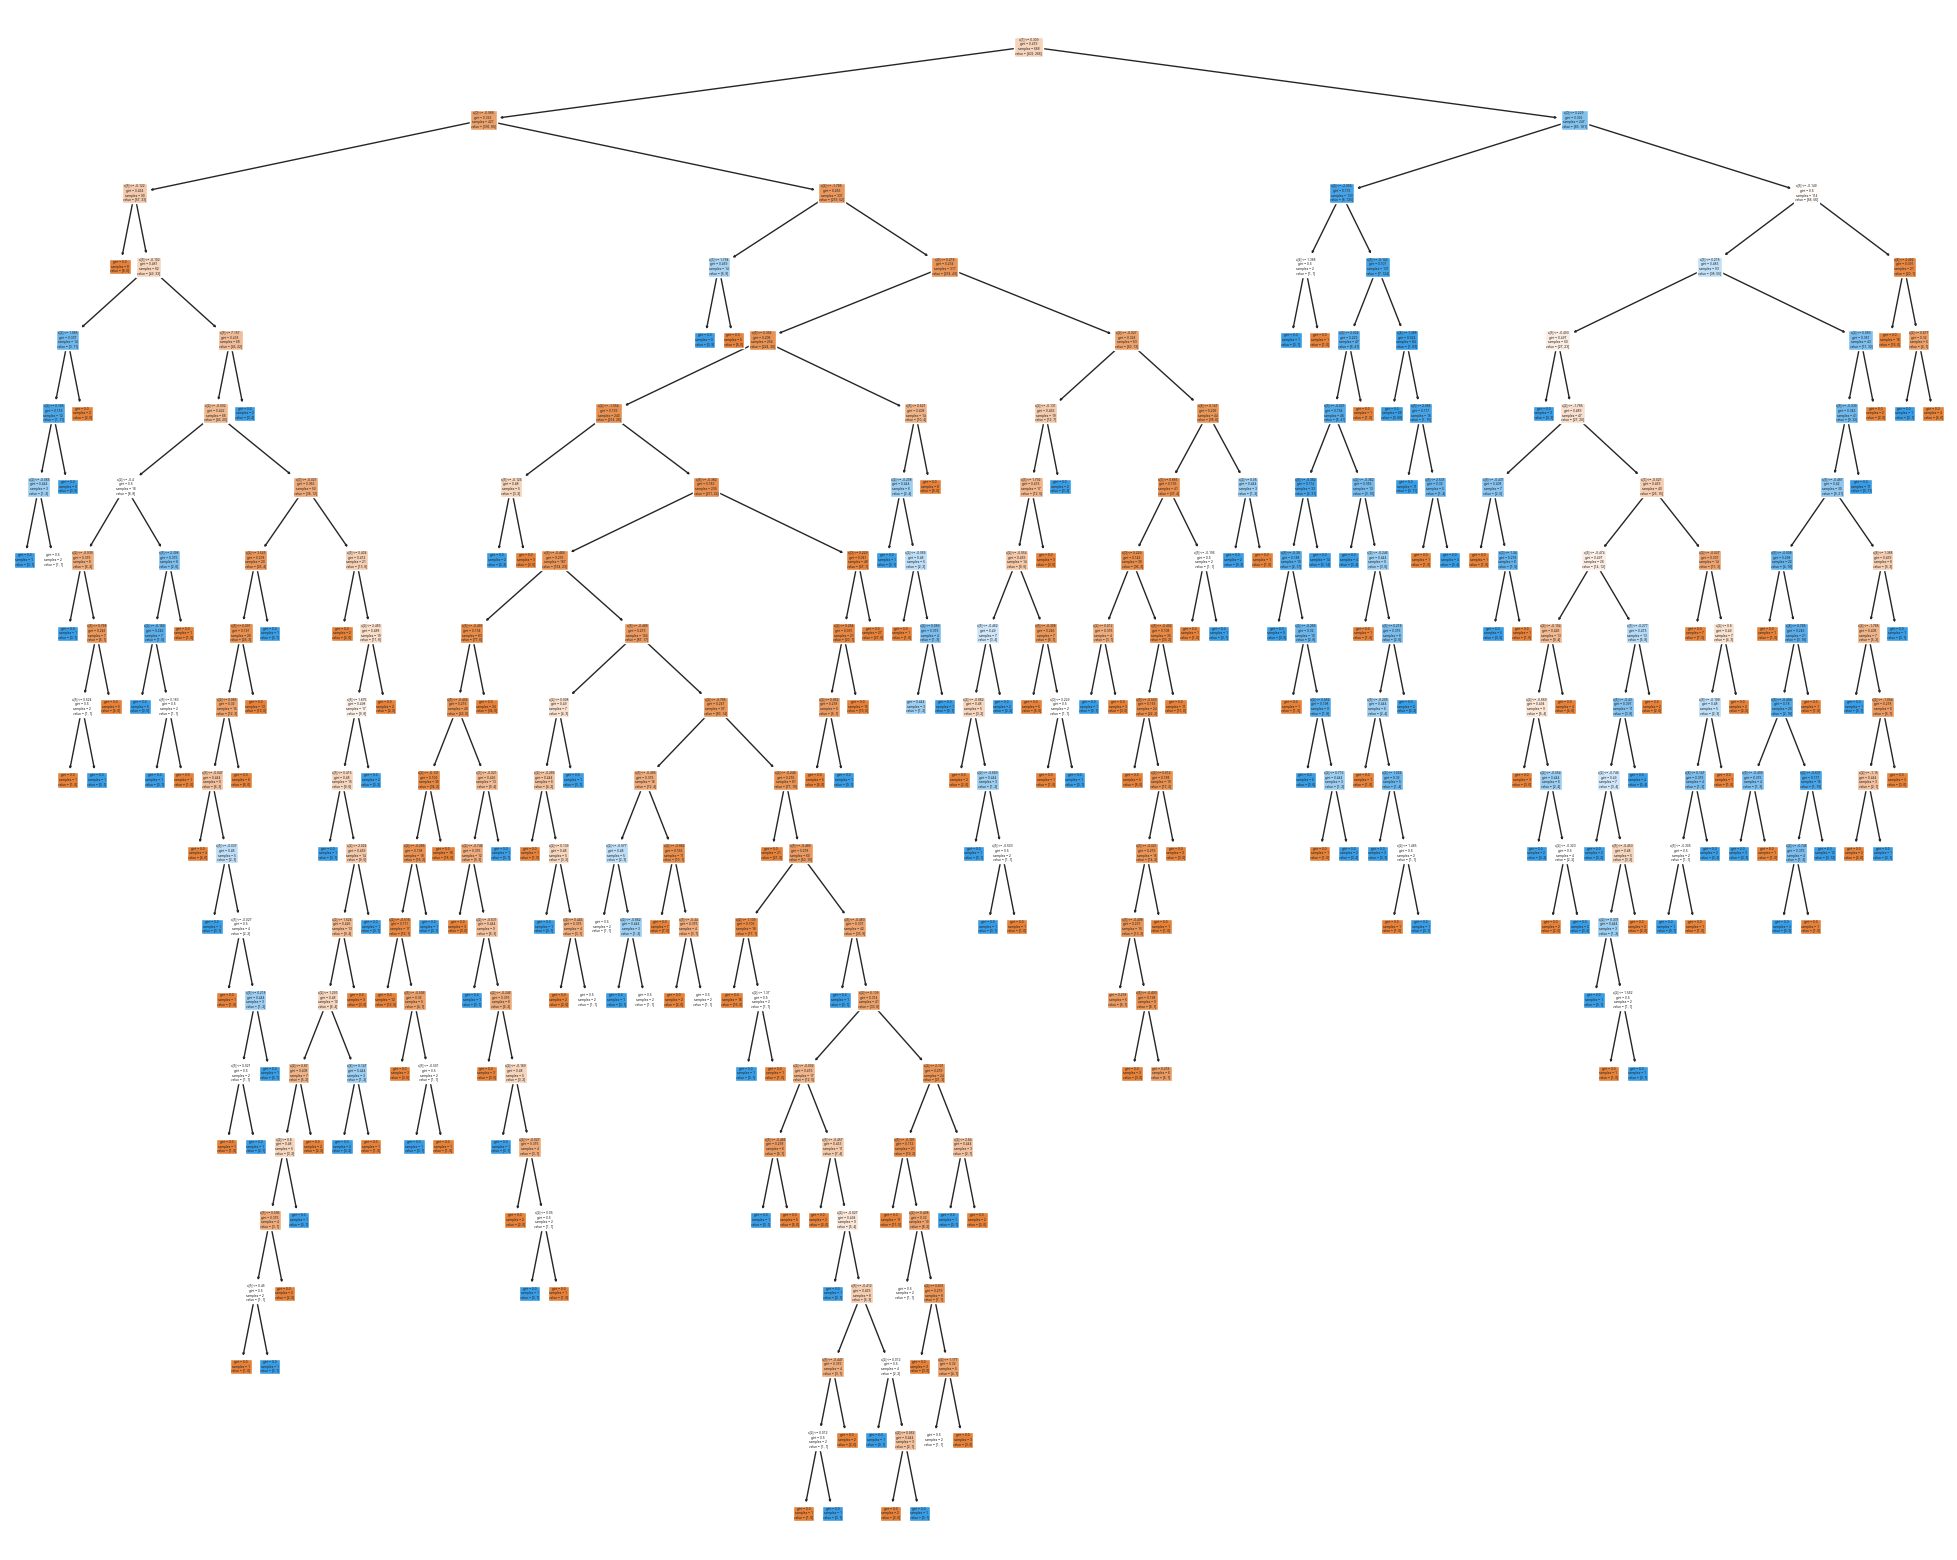

In [108]:
from sklearn import tree
plt.figure(figsize=(25,20))
tree.plot_tree(model,filled=True)

In [111]:
df1

,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,3,1,22.000000,1,0,7.2500,1
1,1,2,38.000000,1,0,71.2833,2
2,3,2,26.000000,0,0,7.9250,1
3,1,2,35.000000,1,0,53.1000,1
4,3,1,35.000000,0,0,8.0500,1
...,...,...,...,...,...,...,...
886,2,1,27.000000,0,0,13.0000,1
887,1,2,19.000000,0,0,30.0000,1
888,3,2,29.699118,1,2,23.4500,1
889,1,1,26.000000,0,0,30.0000,2


In [109]:
param_grid={
    
    'max_depth':[2,3,4,5,6],
    'min_samples_split':[2,3,4,5],
    'min_samples_leaf':[2,3,4],
   
}

In [110]:
from sklearn.model_selection import GridSearchCV
grid_search=GridSearchCV(estimator=model,param_grid=param_grid,cv=5)

In [112]:
grid_search.fit(X_train,y_train)

GridSearchCV(cv=5, estimator=DecisionTreeClassifier(),
             param_grid={'max_depth': [2, 3, 4, 5, 6],
                         'min_samples_leaf': [2, 3, 4],
                         'min_samples_split': [2, 3, 4, 5]})

In [113]:
grid_search.best_estimator_

DecisionTreeClassifier(max_depth=5, min_samples_leaf=2, min_samples_split=3)

In [120]:
grid_search.best_params_

{'max_depth': 5, 'min_samples_leaf': 2, 'min_samples_split': 3}

In [121]:
model2=DecisionTreeClassifier(max_depth=5, min_samples_leaf=2, min_samples_split=3)

In [122]:
model2.fit(X_train,y_train)

DecisionTreeClassifier(max_depth=5, min_samples_leaf=2, min_samples_split=3)

In [124]:
y_pred2=model2.predict(X_test)

In [125]:
accuracy_score(y_test,y_pred2)

0.8340807174887892

In [126]:
model2.score(X_train,y_train)

0.8473053892215568